In [16]:
import numpy as np
import matplotlib.pyplot as plt
import math

# 6.2 Observing Rayleigh Fractionation

In [2]:
# Loading all data
fileloc_rayleigh = "C:/Users/fexfl/Documents/GitHub/FP/F55/twvia_2023-01-08_f0000.txt"

# Loading time seperately as a string
time = np.loadtxt(fileloc_rayleigh, dtype = "str", skiprows = 7844, usecols = (0), delimiter = ",", unpack=True, max_rows = 221)
H2O_ppm, H2O_ppm_sd, O18_del, O18_del_sd, D_del, D_del_sd, O17_del, O17_del_sd=np.loadtxt(fileloc_rayleigh,skiprows = 7844, usecols = (1,2,3,4,5,6,7,8), delimiter = ",", unpack=True, max_rows = 221)

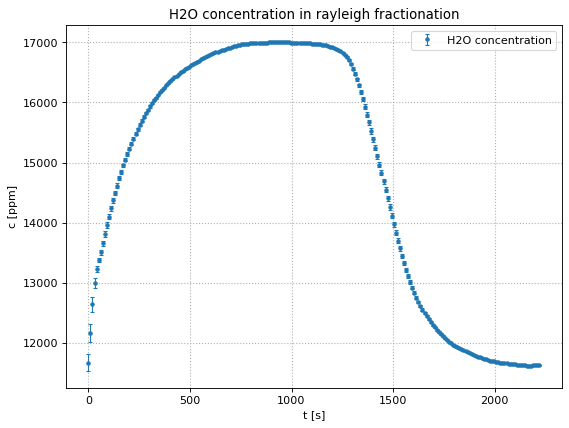

In [3]:
# Defining x axis by calculating delta_t from the beginning of the measurement
t_start = 42960 # seconds, corresponds to 11:56
t_end = 45180 # seconds, corresponds to 12:33
delta_t = t_end - t_start
x = np.linspace(0, delta_t, 221)

plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(x,H2O_ppm, yerr = H2O_ppm_sd, linestyle='None', marker = ".", label="H2O concentration", capsize = 2, elinewidth=1)
plt.xlabel('t [s]')
plt.ylabel('c [ppm]')
plt.title('H2O concentration in rayleigh fractionation')
#plt.yscale('log')
plt.legend()
plt.grid(linestyle=":", linewidth=1)

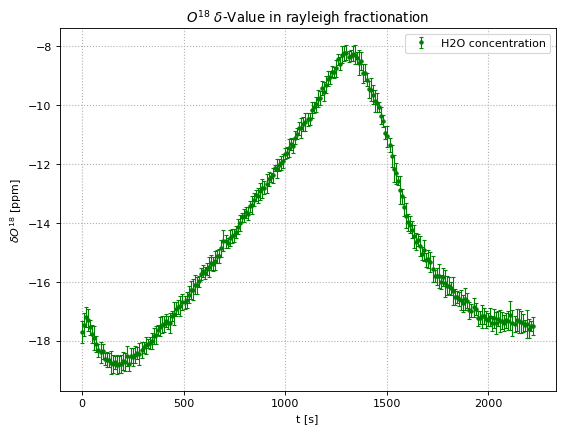

In [4]:
plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(x,O18_del, yerr = O18_del_sd, linestyle='None', marker = ".", color = "green", label="H2O concentration", capsize = 2, elinewidth=1)
plt.xlabel('t [s]')
plt.ylabel('$\delta O^{18}$ [ppm]')
plt.title('$O^{18}$ $\delta$-Value in rayleigh fractionation')
#plt.yscale('log')
plt.legend()
plt.grid(linestyle=":", linewidth=1)

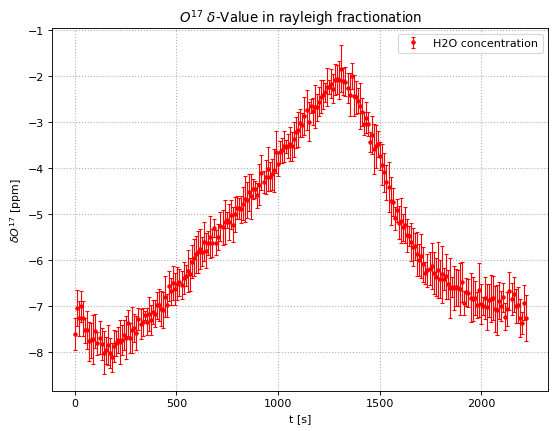

In [5]:
plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(x,O17_del, yerr = O17_del_sd, linestyle='None', marker = ".", color = "red", label="H2O concentration", capsize = 2, elinewidth=1)
plt.xlabel('t [s]')
plt.ylabel('$\delta O^{17}$ [ppm]')
plt.title('$O^{17}$ $\delta$-Value in rayleigh fractionation')
#plt.yscale('log')
plt.legend()
plt.grid(linestyle=":", linewidth=1)

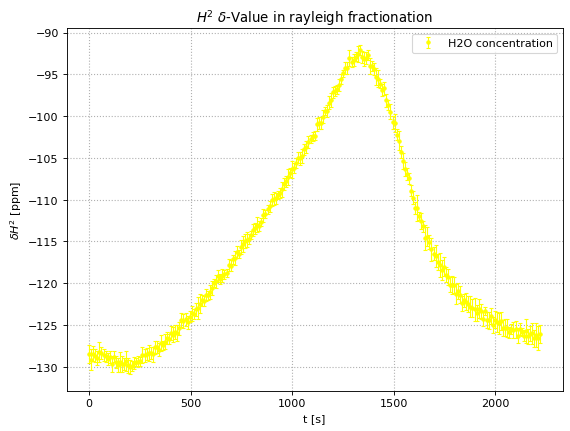

In [6]:
plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(x,D_del, yerr = D_del_sd, linestyle='None', marker = ".", color = "yellow", label="H2O concentration", capsize = 2, elinewidth=1)
plt.xlabel('t [s]')
plt.ylabel('$\delta H^{2}$ [ppm]')
plt.title('$H^2$ $\delta$-Value in rayleigh fractionation')
#plt.yscale('log')
plt.legend()
plt.grid(linestyle=":", linewidth=1)

# 6.1 Evaporation at Different Water Temperatures

In [7]:
fileloc_testo = "C:/Users/fexfl/Documents/GitHub/FP/F55/Testo Data day 1 and half day 2.txt"
testo_id, testo_T, testo_relhum = np.loadtxt(fileloc_testo, skiprows = 1, usecols = (0, 4, 5), unpack=True, max_rows = 323)

In [8]:
testo_T_mean = np.mean(testo_T)
testo_T_mean_sd = np.std(testo_T)

testo_relhum_mean = np.mean(testo_relhum)
testo_relhum_mean_sd = np.std(testo_relhum)

print("Mean Temperature: T = " , testo_T_mean , "+-" , testo_T_mean_sd , " [°C]")
print("Mean relative Humidity: h = " , testo_relhum_mean , "+-" , testo_relhum_mean_sd , " [%]")

Mean Temperature: T =  23.153560371517028 +- 0.7224901159998725  [°C]
Mean relative Humidity: h =  36.88606811145511 +- 1.7699480555089289  [%]


In [10]:
fileloc_w1 = "C:/Users/fexfl/Documents/GitHub/FP/F55/tlwia2023-01-09_f0001-Processed.txt"

sample_name = np.loadtxt(fileloc_w1, skiprows=1, usecols=(0), dtype = "str", unpack=True, max_rows=70)
H2O, delta_2H, delta_2H_sd, delta_18O, delta_18O_sd, delta_17O, delta_17O_sd = np.loadtxt(fileloc_w1, skiprows=1, usecols=(1,2,3,4,5,6,7), unpack=True, max_rows=70)

In [45]:
# Now create arrays for the 40 and 50 degree water data
water_40_H2O_2d = np.array([[0,0], [0,0], [0,0], [0,0], [0,0], [0,0], [0,0]], np.float64)
water_50_H2O_2d = np.array([[0,0], [0,0], [0,0], [0,0], [0,0], [0,0], [0,0]], np.float64)
water_40_H2O = np.array([0,0,0,0,0,0,0], np.float64)
water_50_H2O = np.array([0,0,0,0,0,0,0], np.float64)
for i in range(sample_name.size):
    if ("40;" in sample_name[i]):
        sample_id = sample_name[i][9:]
        sample_id_int = int(sample_id) - 1
        # print("Sample ID:", sample_id_int + 1)
        if (math.isnan(H2O[i]) == False):
            water_40_H2O_2d[sample_id_int,0] += H2O[i]
            water_40_H2O_2d[sample_id_int,1] += float(1)
            # print("Adding H2O value of ", H2O[i])
            
    if ("50;" in sample_name[i]):
        sample_id = sample_name[i][9:]
        if (math.isnan(H2O[i]) == False):
            water_50_H2O_2d[sample_id_int,0] += H2O[i]
            water_50_H2O_2d[sample_id_int,1] += float(1)
            
for i in range(water_40_H2O.size):
    if (water_40_H2O_2d[i,1]!=0):
        water_40_H2O[i] = water_40_H2O_2d[i,0]/water_40_H2O_2d[i,1]
    else:
        water_40_H2O[i] = float("nan")
    if (water_50_H2O_2d[i,1]!=0):
        water_50_H2O[i] = water_50_H2O_2d[i,0]/water_50_H2O_2d[i,1]
    else:
        water_50_H2O[i] = float("nan")
print(water_40_H2O)
print(water_50_H2O)

[3.3233400e+16 2.6471800e+16 2.7460600e+16 2.7878100e+16 2.4399630e+16
 1.5433530e+16 2.2936075e+16]
[3.0302960e+16 2.9535225e+16 1.6678450e+16 3.1267670e+16 2.6290050e+16
           nan 2.7289450e+16]


In [55]:
# Do the same for delta D values
water_40_delta_2H_2d = np.array([[0,0], [0,0], [0,0], [0,0], [0,0], [0,0], [0,0]], np.float64)
water_50_delta_2H_2d = np.array([[0,0], [0,0], [0,0], [0,0], [0,0], [0,0], [0,0]], np.float64)
water_40_delta_2H_sd_2d = np.array([[0,0], [0,0], [0,0], [0,0], [0,0], [0,0], [0,0]], np.float64)
water_50_delta_2H_sd_2d = np.array([[0,0], [0,0], [0,0], [0,0], [0,0], [0,0], [0,0]], np.float64)
water_40_delta_2H = np.array([0,0,0,0,0,0,0], np.float64)
water_50_delta_2H = np.array([0,0,0,0,0,0,0], np.float64)
water_40_delta_2H_sd = np.array([0,0,0,0,0,0,0], np.float64)
water_50_delta_2H_sd = np.array([0,0,0,0,0,0,0], np.float64)
for i in range(sample_name.size):
    if ("40;" in sample_name[i]):
        sample_id = sample_name[i][9:]
        sample_id_int = int(sample_id) - 1
        #print("Sample ID:", sample_id_int + 1)
        if ((math.isnan(delta_2H[i]) == False) and (math.isnan(delta_2H_sd[i]) == False)):
            water_40_delta_2H_2d[sample_id_int,0] += delta_2H[i]
            water_40_delta_2H_2d[sample_id_int,1] += float(1)
            
            water_40_delta_2H_sd_2d[sample_id_int,0] += delta_2H_sd[i]**2
            water_40_delta_2H_sd_2d[sample_id_int,1] += float(1)
            
    if ("50;" in sample_name[i]):
        sample_id = sample_name[i][9:]
        if ((math.isnan(delta_2H[i]) == False) and (math.isnan(delta_2H_sd[i]) == False)):
            water_50_delta_2H_2d[sample_id_int,0] += delta_2H[i]
            water_50_delta_2H_2d[sample_id_int,1] += float(1)
            
            water_50_delta_2H_sd_2d[sample_id_int,0] += delta_2H_sd[i]**2
            water_50_delta_2H_sd_2d[sample_id_int,1] += float(1)
            
for i in range(water_40_delta_2H.size):
    if (water_40_delta_2H_2d[i,1]!=0):
        water_40_delta_2H[i] = water_40_delta_2H_2d[i,0]/water_40_delta_2H_2d[i,1]
    else:
        water_40_delta_2H[i] = float("nan")
    
    if (water_40_delta_2H_sd_2d[i,1]!=0):
        water_40_delta_2H_sd[i] = np.sqrt(water_40_delta_2H_sd_2d[i,0])/water_40_delta_2H_sd_2d[i,1]
    else:
        water_40_delta_2H_sd[i] = float("nan")
    
    if (water_50_delta_2H_2d[i,1]!=0):
        water_50_delta_2H[i] = water_50_delta_2H_2d[i,0]/water_50_delta_2H_2d[i,1]
    else:
        water_50_delta_2H[i] = float("nan")
        
    if (water_50_delta_2H_sd_2d[i,1]!=0):
        water_50_delta_2H_sd[i] = np.sqrt(water_50_delta_2H_sd_2d[i,0])/water_50_delta_2H_sd_2d[i,1]
    else:
        water_50_delta_2H_sd[i] = float("nan")

print(water_40_delta_2H)
print(water_40_delta_2H_sd)
print(water_50_delta_2H)
print(water_50_delta_2H_sd)

[-57.42799   -59.136965  -55.42067   -56.764959  -54.756035  -52.187649
 -53.0881565]
[0.         0.4001397  1.607344   0.         0.6436721  0.6911139
 0.55712769]
[-59.096517  -56.5138885 -55.859896  -54.097809  -50.5286665         nan
 -46.343997 ]
[0.21652688 0.2017064  0.8274098  0.6240026  0.16154375        nan
 1.199208  ]


In [57]:
# Do the same for delta 18O values
water_40_delta_18O_2d = np.array([[0,0], [0,0], [0,0], [0,0], [0,0], [0,0], [0,0]], np.float64)
water_50_delta_18O_2d = np.array([[0,0], [0,0], [0,0], [0,0], [0,0], [0,0], [0,0]], np.float64)
water_40_delta_18O_sd_2d = np.array([[0,0], [0,0], [0,0], [0,0], [0,0], [0,0], [0,0]], np.float64)
water_50_delta_18O_sd_2d = np.array([[0,0], [0,0], [0,0], [0,0], [0,0], [0,0], [0,0]], np.float64)
water_40_delta_18O = np.array([0,0,0,0,0,0,0], np.float64)
water_50_delta_18O = np.array([0,0,0,0,0,0,0], np.float64)
water_40_delta_18O_sd = np.array([0,0,0,0,0,0,0], np.float64)
water_50_delta_18O_sd = np.array([0,0,0,0,0,0,0], np.float64)
for i in range(sample_name.size):
    if ("40;" in sample_name[i]):
        sample_id = sample_name[i][9:]
        sample_id_int = int(sample_id) - 1
        #print("Sample ID:", sample_id_int + 1)
        if ((math.isnan(delta_18O[i]) == False) and (math.isnan(delta_18O_sd[i]) == False)):
            water_40_delta_18O_2d[sample_id_int,0] += delta_18O[i]
            water_40_delta_18O_2d[sample_id_int,1] += float(1)
            #print("Adding the following O18 value: ", delta_18O[i])
            
            water_40_delta_18O_sd_2d[sample_id_int,0] += delta_18O_sd[i]**2
            water_40_delta_18O_sd_2d[sample_id_int,1] += float(1)
            
    if ("50;" in sample_name[i]):
        sample_id = sample_name[i][9:]
        if ((math.isnan(delta_18O[i]) == False) and (math.isnan(delta_18O_sd[i]) == False)):
            water_50_delta_18O_2d[sample_id_int,0] += delta_18O[i]
            water_50_delta_18O_2d[sample_id_int,1] += float(1)
            
            water_50_delta_18O_sd_2d[sample_id_int,0] += delta_18O_sd[i]**2
            water_50_delta_18O_sd_2d[sample_id_int,1] += float(1)
            
for i in range(water_40_delta_18O.size):
    if (water_40_delta_18O_2d[i,1]!=0):
        water_40_delta_18O[i] = water_40_delta_18O_2d[i,0]/water_40_delta_18O_2d[i,1]
    else:
        water_40_delta_18O[i] = float("nan")
    
    if (water_40_delta_18O_sd_2d[i,1]!=0):
        water_40_delta_18O_sd[i] = np.sqrt(water_40_delta_18O_sd_2d[i,0])/water_40_delta_18O_sd_2d[i,1]
    else:
        water_40_delta_18O_sd[i] = float("nan")
    
    if (water_50_delta_18O_2d[i,1]!=0):
        water_50_delta_18O[i] = water_50_delta_18O_2d[i,0]/water_50_delta_18O_2d[i,1]
    else:
        water_50_delta_18O[i] = float("nan")
        
    if (water_50_delta_18O_sd_2d[i,1]!=0):
        water_50_delta_18O_sd[i] = np.sqrt(water_50_delta_18O_sd_2d[i,0])/water_50_delta_18O_sd_2d[i,1]
    else:
        water_50_delta_18O_sd[i] = float("nan")

print(water_40_delta_18O)
print(water_40_delta_18O_sd)
print(water_50_delta_18O)
print(water_50_delta_18O_sd)

Adding the following O18 value:  -8.193092
Adding the following O18 value:  -7.466233
Adding the following O18 value:  -6.79633
Adding the following O18 value:  -5.178633
Adding the following O18 value:  50.836799
Adding the following O18 value:  31.34724
Adding the following O18 value:  -5.867249
Adding the following O18 value:  -7.45292
[50.836799  -8.193092  31.34724   -7.466233  -6.79633   -5.867249
 -6.3157765]
[0.         0.04734013 0.133009   0.         0.1144211  0.1004899
 0.17252578]
[20.4854235 11.813379  -5.664231  -8.129712  -5.9619395        nan
 -4.60059  ]
[0.05035166 0.04539338 0.2597232  0.1800414  0.07759675        nan
 0.2194946 ]


In [59]:
# Do the same for delta 17O values
water_40_delta_17O_2d = np.array([[0,0], [0,0], [0,0], [0,0], [0,0], [0,0], [0,0]], np.float64)
water_50_delta_17O_2d = np.array([[0,0], [0,0], [0,0], [0,0], [0,0], [0,0], [0,0]], np.float64)
water_40_delta_17O_sd_2d = np.array([[0,0], [0,0], [0,0], [0,0], [0,0], [0,0], [0,0]], np.float64)
water_50_delta_17O_sd_2d = np.array([[0,0], [0,0], [0,0], [0,0], [0,0], [0,0], [0,0]], np.float64)
water_40_delta_17O = np.array([0,0,0,0,0,0,0], np.float64)
water_50_delta_17O = np.array([0,0,0,0,0,0,0], np.float64)
water_40_delta_17O_sd = np.array([0,0,0,0,0,0,0], np.float64)
water_50_delta_17O_sd = np.array([0,0,0,0,0,0,0], np.float64)
for i in range(sample_name.size):
    if ("40;" in sample_name[i]):
        sample_id = sample_name[i][9:]
        sample_id_int = int(sample_id) - 1
        #print("Sample ID:", sample_id_int + 1)
        if ((math.isnan(delta_17O[i]) == False) and (math.isnan(delta_17O_sd[i]) == False)):
            water_40_delta_17O_2d[sample_id_int,0] += delta_17O[i]
            water_40_delta_17O_2d[sample_id_int,1] += float(1)
            print("Adding the following O17 value: ", delta_17O[i])
            
            water_40_delta_17O_sd_2d[sample_id_int,0] += delta_17O_sd[i]**2
            water_40_delta_17O_sd_2d[sample_id_int,1] += float(1)
            
    if ("50;" in sample_name[i]):
        sample_id = sample_name[i][9:]
        if ((math.isnan(delta_17O[i]) == False) and (math.isnan(delta_17O_sd[i]) == False)):
            water_50_delta_17O_2d[sample_id_int,0] += delta_17O[i]
            water_50_delta_17O_2d[sample_id_int,1] += float(1)
            
            water_50_delta_17O_sd_2d[sample_id_int,0] += delta_17O_sd[i]**2
            water_50_delta_17O_sd_2d[sample_id_int,1] += float(1)
            
for i in range(water_40_delta_17O.size):
    if (water_40_delta_17O_2d[i,1]!=0):
        water_40_delta_17O[i] = water_40_delta_17O_2d[i,0]/water_40_delta_17O_2d[i,1]
    else:
        water_40_delta_17O[i] = float("nan")
    
    if (water_40_delta_17O_sd_2d[i,1]!=0):
        water_40_delta_17O_sd[i] = np.sqrt(water_40_delta_17O_sd_2d[i,0])/water_40_delta_17O_sd_2d[i,1]
    else:
        water_40_delta_17O_sd[i] = float("nan")
    
    if (water_50_delta_17O_2d[i,1]!=0):
        water_50_delta_17O[i] = water_50_delta_17O_2d[i,0]/water_50_delta_17O_2d[i,1]
    else:
        water_50_delta_17O[i] = float("nan")
        
    if (water_50_delta_17O_sd_2d[i,1]!=0):
        water_50_delta_17O_sd[i] = np.sqrt(water_50_delta_17O_sd_2d[i,0])/water_50_delta_17O_sd_2d[i,1]
    else:
        water_50_delta_17O_sd[i] = float("nan")

print(water_40_delta_17O)
print(water_40_delta_17O_sd)
print(water_50_delta_17O)
print(water_50_delta_17O_sd)

Adding the following O17 value:  -4.295173
Adding the following O17 value:  -3.559859
Adding the following O17 value:  -3.238439
Adding the following O17 value:  -2.991049
Adding the following O17 value:  -4.78728
Adding the following O17 value:  -4.512234
Adding the following O17 value:  -3.510815
Adding the following O17 value:  -3.623824
[-4.78728   -4.295173  -4.512234  -3.559859  -3.238439  -3.510815
 -3.3074365]
[0.         0.1230592  0.0028314  0.         0.1478526  0.03851174
 0.07785622]
[-4.553111  -4.3088395 -3.442549  -3.614784  -2.7086535        nan
 -2.040859 ]
[0.02857942 0.02934197 0.06685662 0.1211159  0.04632533        nan
 0.1460979 ]
